In [1]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
import pandas as pd
import sys
from pathlib import Path
import os
import pingouin as pg

# Import project specific modules and enable automatic reloading
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as erp
from plotting import Fig, pretty_plot, FigMirror
import placefield_stability as pfs
import Placefields as pf
import discrimination as discr
import ca_traces as trc
import helpers

In [19]:
# Set up main figure plotting
%matplotlib ipympl
FigRegQ = Fig(num=1, grid=(4, 4), size=(8.5, 6.5), fontsize=6)
print(FigRegQ.fig.get_size_inches())

[8.5 6.5]


In [21]:
# Define key lambda function
get_sesh_name = lambda day: "4 Hour" if day == 4 else f"Day {day}"

### Plot change in ROI orientation between groups

In [14]:
actrl = FigRegQ.subplot((4, 4, 9))
aani = FigRegQ.subplot((4, 4, 10))
acomb = FigRegQ.subplot((4, 4, 11))
ax = [actrl, aani, acomb]

days_compare = [-1, 4]
bin_size = 5
bin_edges = np.arange(0, 185, bin_size)
for grp, grp_name, a in zip([err.control_mice_good, err.ani_mice_good], ['Ctrl', 'ANI'], ax[:2]):
    orient_diff_all = []
    for mouse in grp:
        orient_diff = trc.calc_orientation_diff_bw_sessions(mouse, 'Shock', days_compare[0], 'Shock', days_compare[1])
        nhist = np.histogram(np.abs(orient_diff) * 180 / np.pi, bin_edges)[0]
        pbin = nhist / len(orient_diff)
        orient_diff_all.append(np.abs(orient_diff) * 180 / np.pi)
        a.plot(bin_edges[:-1] + bin_size / 2, pbin)
    a.set_title(f"{grp_name}: {get_sesh_name(days_compare[0])} to {get_sesh_name(days_compare[1])}")
    a.set_xlabel("Change in ROI Orientation (degrees)")
    a.set_ylabel("Probability")
    ax[2].ecdf(np.concatenate(orient_diff_all).reshape(-1))
ax[2].legend(['Ctrl', 'ANI'])
ax[2].set_xlabel("Change in ROI Orientation (degrees)")
ax[2].set_ylabel("Cumulative Probability")

Text(0, 0.5, 'Cumulative Probability')

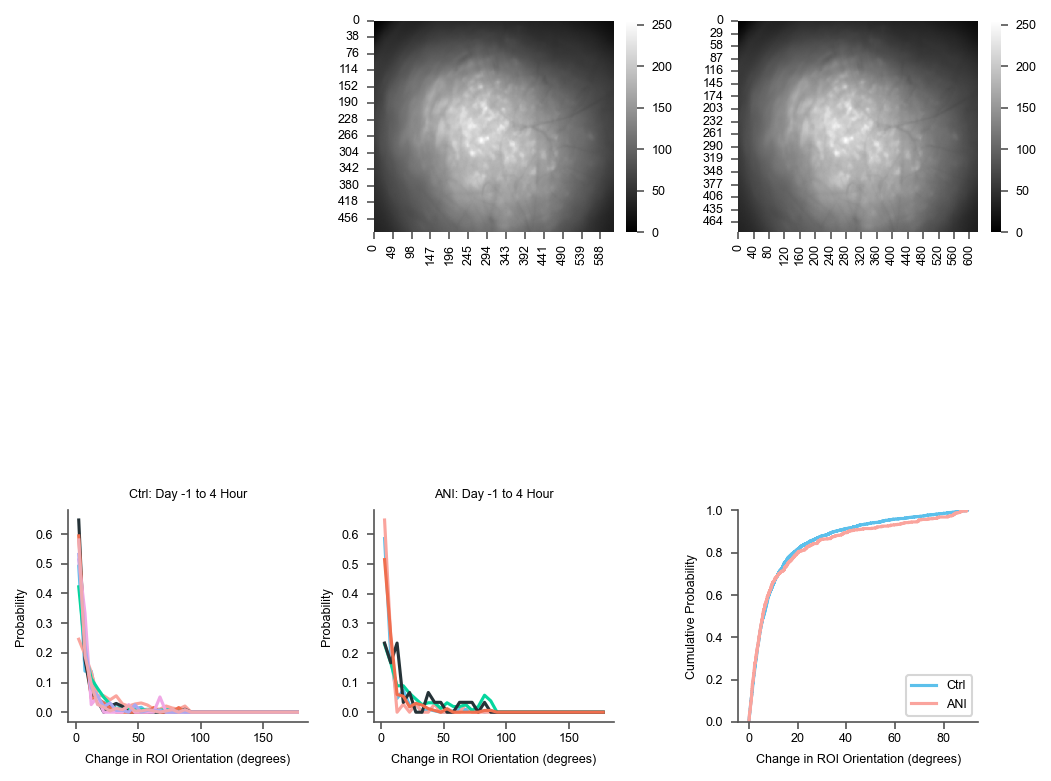

In [18]:
FigRegQ.fig

### Plot min projection from day -1 to 4 hour session

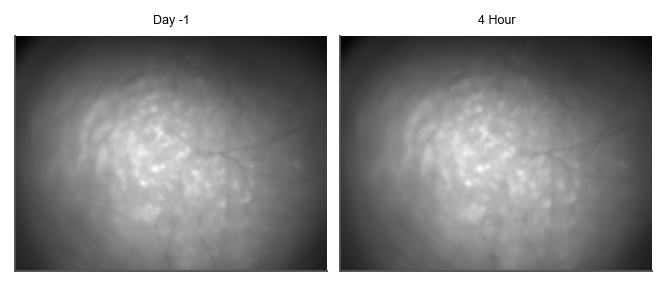

In [22]:
an1 = FigRegQ.subplot((4, 4, 2))
a4 = FigRegQ.subplot((4, 4, 3))
ax = [an1, a4]

days_compare = [-1, 4]
mouse = 'Marble07'
for a, day in zip(ax, days_compare):
    min_proj = trc.load_proj(mouse, 'Shock', days_compare[0], 'min')
    sns.heatmap(min_proj, cmap='grey', cbar=False, ax=a)
    sns.despine(ax=a)
    a.set_xticks([])
    a.set_yticks([])
    a.set_title(get_sesh_name(day))

FigRegQ.fig

<Axes: >

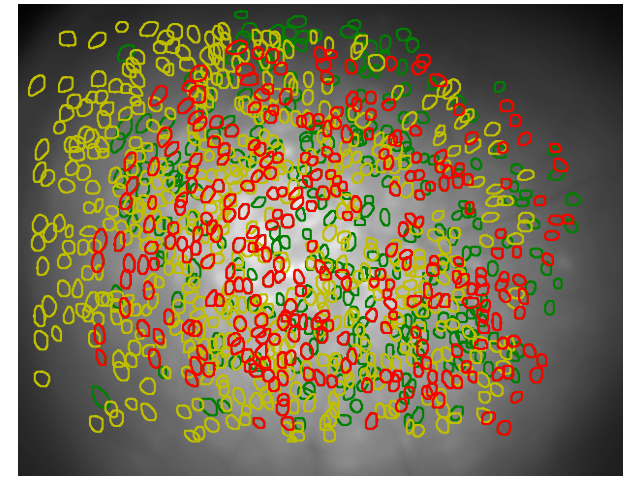

In [23]:
trc.plot_ROIs_bw_sessions('Marble07', 'Shock', -1, 'Shock', 4)